# Analysis teacher survey results

Combined results for clusters and categories

In [1]:
# Imports
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))
# print(sys.path)
import pandas as pd
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import seaborn as sns
import matplotlib.ticker as ticker
import math
import pingouin as pg

In [2]:
# Load base ABT
abt = pd.read_excel('../data/survey results/teachers all values only.xlsx')
# abt = pd.read_excel('../data/survey results/teachers han values only.xlsx')
abt

,Cluster: complexity,Cluster: side effects,Cluster: reusability,Cluster: incomplete,Cluster: best practices,Category: CodeStyle,Category: ErrorProne,Category: SizeViolations,Category: Design
0,4.0,3,2,1,2,3,4.0,2,4
1,3.0,3,2,4,4,3,2.0,1,3
2,4.0,2,5,5,2,1,4.0,3,2
3,2.0,5,3,3,5,3,3.0,2,3
4,3.0,3,3,3,5,5,3.0,4,3
5,2.0,2,3,3,4,4,NaN,4,4
6,3.0,2,4,3,4,4,3.0,3,2
7,3.0,2,2,3,2,2,1.0,1,2
8,2.0,5,3,1,4,3,1.0,2,5
9,4.0,4,5,5,4,4,4.0,4,4


In [3]:
# Some NaNs (3 records out of 23 total with 1 NaN each). Fill them with the median
for col in abt.columns:
    abt[col] = abt[col].fillna(abt[col].median())
abt

,Cluster: complexity,Cluster: side effects,Cluster: reusability,Cluster: incomplete,Cluster: best practices,Category: CodeStyle,Category: ErrorProne,Category: SizeViolations,Category: Design
0,4.0,3,2,1,2,3,4.0,2,4
1,3.0,3,2,4,4,3,2.0,1,3
2,4.0,2,5,5,2,1,4.0,3,2
3,2.0,5,3,3,5,3,3.0,2,3
4,3.0,3,3,3,5,5,3.0,4,3
5,2.0,2,3,3,4,4,3.0,4,4
6,3.0,2,4,3,4,4,3.0,3,2
7,3.0,2,2,3,2,2,1.0,1,2
8,2.0,5,3,1,4,3,1.0,2,5
9,4.0,4,5,5,4,4,4.0,4,4


## Responses

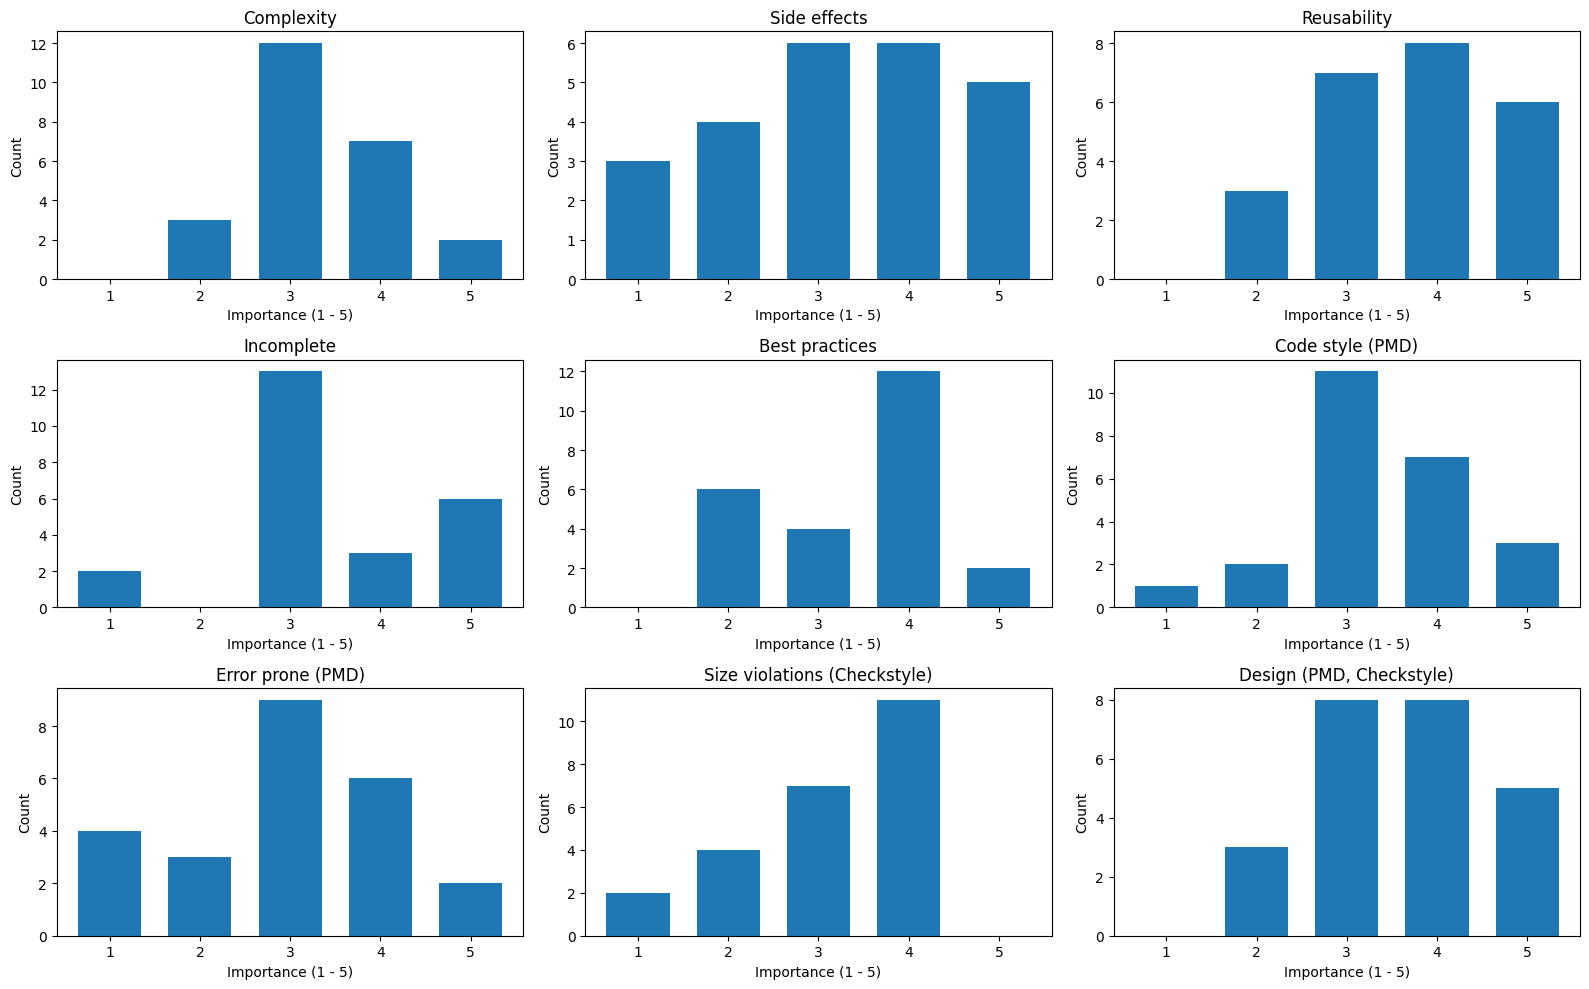

In [10]:
ncols = 3
nrows = math.ceil(len(abt.columns) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (16, 10))
col = 0
row = 0

col_name_map = {
    'Cluster: complexity' : 'Complexity',
    'Cluster: side effects' : 'Side effects',
    'Cluster: reusability' : 'Reusability',
    'Cluster: incomplete' : 'Incomplete',
    'Cluster: best practices' : 'Best practices',
    'Category: CodeStyle' : 'Code style (PMD)',
    'Category: Design' : 'Design (PMD, Checkstyle)',
    'Category: SizeViolations' : 'Size violations (Checkstyle)',
    'Category: ErrorProne' : 'Error prone (PMD)',
}

for col_name in abt.columns:
    # print(f'Name {col_name} Row {row} col {col}')
    ax = abt[col_name].hist(
        ax = axes[row, col],
        bins = [1, 2, 3, 4, 5, 6], 
        rwidth = 0.7, 
        range = [ 1, 2, 3, 4, 5, 6],
        align = "left")
    ax.grid(False)
    ax.set_xlabel('Importance (1 - 5)')
    ax.set_ylabel('Count')
    ax.set_title(col_name_map[col_name])
    
    ax.set_xticks([1, 2, 3, 4, 5])
    col = col + 1
    if col >= ncols:
        col = 0
        row = row + 1


# Only works because I know it's only the last one that doesn't exist.
# axes[-1, -1].axis('off')

fig.tight_layout()
plt.show()

## Median values and percentiles

The spread is fairly large, so these values are likely not very significant.

In [9]:
summary = {}
num_recs = len(abt)



for col in abt.columns:
    col_summary = {
        'median' : abt[col].median().astype('int')
    }
    
    for val in range(1, 6):
        col_summary[f'Perc. {val}'] = int((len(abt[abt[col] == val]) / num_recs) * 100)

    # 1 and 2 : unimportant.
    # 2, 3 and 4: average
    # 4 and 5: important
    col_summary["Perc. unimportant (1, 2)"] = int((len(abt[abt[col] < 3]) / num_recs) * 100) 
    col_summary["Perc. average (2, 3, 4)"] = int((len(abt[abt[col].between(1, 5, inclusive='neither')]) / num_recs) * 100) 
    col_summary["Perc. important (4, 5)"] = int((len(abt[abt[col] > 3]) / num_recs) * 100)    

    # Weighted average

    weights_sum = abt[abt[col] == 1][col].sum() + \
                                        abt[abt[col] == 2][col].apply(lambda x : 2).sum() + \
                                        abt[abt[col] == 3][col].apply(lambda x : 3).sum() + \
                                        abt[abt[col] == 4][col].apply(lambda x : 4).sum() + \
                                        abt[abt[col] == 5][col].apply(lambda x : 5).sum()
    weights_val = abt[abt[col] == 1][col].sum() + \
                                        abt[abt[col] == 2][col].sum() * 2 + \
                                        abt[abt[col] == 3][col].sum() * 3 + \
                                        abt[abt[col] == 4][col].sum() * 4 + \
                                        abt[abt[col] == 5][col].sum() * 5
    col_summary["Weighted average"] = float(round((weights_val / weights_sum) * 10)) / 10
    # col_summary["Weighted average"] = weights_sum
    summary[col] = col_summary

df_summary = pd.DataFrame.from_dict(summary)
df_summary.to_clipboard()
df_summary

# abt[abt['Cluster: reusability'] ==2]['Cluster: reusability'].apply(lambda x: 2).sum()


,Cluster: complexity,Cluster: side effects,Cluster: reusability,Cluster: incomplete,Cluster: best practices,Category: CodeStyle,Category: ErrorProne,Category: SizeViolations,Category: Design
median,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0
Perc. 1,0.0,12.0,0.0,8.0,0.0,4.0,16.0,8.0,0.0
Perc. 2,12.0,16.0,12.0,0.0,25.0,8.0,12.0,16.0,12.0
Perc. 3,50.0,25.0,29.0,54.0,16.0,45.0,37.0,29.0,33.0
Perc. 4,29.0,25.0,33.0,12.0,50.0,29.0,25.0,45.0,33.0
Perc. 5,8.0,20.0,25.0,25.0,8.0,12.0,8.0,0.0,20.0
"Perc. unimportant (1, 2)",12.0,29.0,12.0,8.0,25.0,12.0,29.0,25.0,12.0
"Perc. average (2, 3, 4)",91.0,66.0,75.0,66.0,91.0,83.0,75.0,91.0,79.0
"Perc. important (4, 5)",37.0,45.0,58.0,37.0,58.0,41.0,33.0,45.0,54.0
Weighted average,3.5,3.8,4.0,3.8,3.7,3.6,3.4,3.4,3.9


# Cronbach's Alpha

Determine the internal consistency of the results. Use the interpretation of Cronbach's alpha defined by George and Mallery (2003) as quoted in Gliem and Gliem (2003):

- _ > .9 – Excellent
- _ > .8 – Good
- _ > .7 – Acceptable
- _ > .6 – Questionable
- _ > .5 – Poor
- _ < .5 – Unacceptable


In [8]:
pg.cronbach_alpha(data=abt)

(0.6310406698564595, array([0.361, 0.817]))